In [103]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib
from matplotlib import pyplot as plt

In [104]:
df = pd.read_csv('C:/MyFolder/Data/train.csv')


In [105]:
print ("Train data shape:", df.shape)


Train data shape: (1460, 81)


In [106]:
df.SalePrice.describe()

NameError: name 'trainn' is not defined

In [31]:
#From the ABOVE REPORT, we can see that for 1460 data values, the avarage house price is $180921

In [32]:
#Now, there can be a possiblity that one house belongs to SRK, and another to Rahul V.
#Therefore, we need to check the skewness.

Skew is: 1.8828757597682129


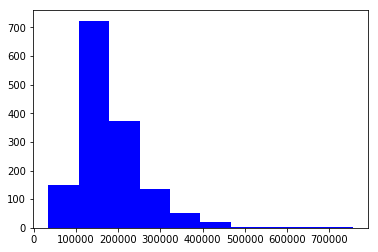

In [37]:
print ("Skew is:", df.SalePrice.skew())
plt.hist(df.SalePrice, color='blue')
plt.show()

Skew is: 0.12133506220520406


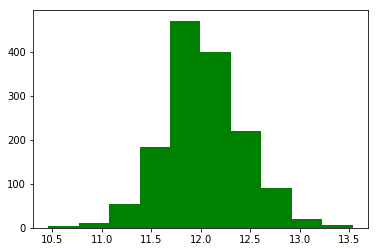

In [35]:
#We are going to use natural logarithm ---> log
target = np.log(df.SalePrice)
print ("Skew is:", target.skew())
plt.hist(target, color='green')
plt.show()

In [ ]:
#Now as we have so many variable, we need to find out correlation between salePrice vs all.

#I tried this way:
#listOfColumns = df.columns
#for col in listOfColumns:
    #print(col)
    #print(stats.pearsonr(df[col], df['SalePrice']))

#But this way is ###########WRONG######, as correlation is computed amongst numerical values



In [40]:
#Finding Numerical Columns
numeric_features = df.select_dtypes(include=[np.number])
numeric_features.dtypes

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

In [45]:
#Now, we can see the Numerical Columns.
#Time to compute correlation

In [46]:
#Finding the first five features are the most positively correlated with SalePrice
corr = numeric_features.corr()
print (corr['SalePrice'].sort_values(ascending=False)[:5], '\n')

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64 



In [47]:
#The next five are the most negatively correlated with SalePrice.
print (corr['SalePrice'].sort_values(ascending=False)[-5:])

YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


In [48]:
#Wow Feeling !!!

In [ ]:
#Now we will pick the +ve Correlated columns one by one for our analysis purpose.

In [ ]:
#--------------------------STARTING WITH OverallQual------------------------------------#
#REASON: This is the most promising/driving factor.You can consider it as Overall Rating.

In [50]:
df['OverallQual']

0        7
1        6
2        7
3        7
4        8
5        5
6        8
7        7
8        7
9        5
10       5
11       9
12       5
13       7
14       6
15       7
16       6
17       4
18       5
19       5
20       8
21       7
22       8
23       5
24       5
25       8
26       5
27       8
28       5
29       4
        ..
1430     5
1431     6
1432     4
1433     6
1434     5
1435     6
1436     4
1437     8
1438     6
1439     7
1440     6
1441     6
1442    10
1443     6
1444     7
1445     6
1446     5
1447     8
1448     4
1449     5
1450     5
1451     8
1452     5
1453     5
1454     7
1455     6
1456     6
1457     7
1458     5
1459     5
Name: OverallQual, Length: 1460, dtype: int64

In [90]:
df.OverallQual.unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2], dtype=int64)

In [ ]:
####### CHECKING MEDIAN OF RATING-7 STARTS #########

In [93]:
dff = df[df['OverallQual']== 7]

In [96]:
dff.shape

(319, 81)

In [97]:
dff['SalePrice'].median()

200141.0

In [ ]:
####### CHECKING MEDIAN OF RATING-7 ENDS #########

In [ ]:
#PIVOT TABLE
#From Wikipedia, the free encyclopedia

#A pivot table is a table that summarizes data from another table, and is made by applying an operation such as sorting,
#averaging, or summing to data in the first table, typically including grouping of the data. Pivot tables are used in 
#data processing and are found in data visualization programs such as spreadsheets or business intelligence software. 

In [ ]:
#To get the median of all the SalePrice for each rating, follow the Pivot Table approach ! 

In [53]:
quality_pivot = df.pivot_table(index='OverallQual',
                                  values='SalePrice', aggfunc=np.median)

In [55]:
quality_pivot

,SalePrice
OverallQual,
1,50150
2,60000
3,86250
4,108000
5,133000
6,160000
7,200141
8,269750
9,345000


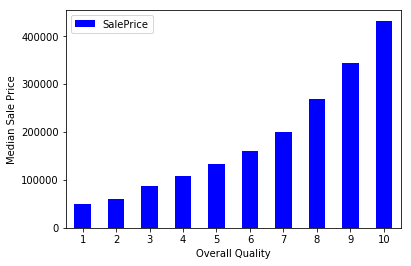

In [100]:
quality_pivot.plot(kind='bar', color='blue')
plt.xlabel('Overall Quality')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

In [101]:
#---------------------------------NEXT COMES GrLivArea---------------------------------------#
#REASON: This is the second most promising/driving factor.GrLivArea means Ground Living Area.

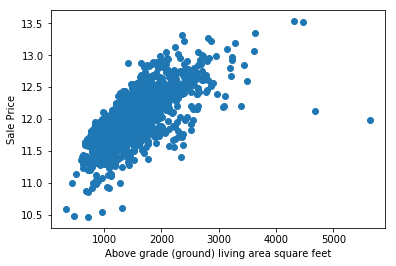

In [102]:
plt.scatter(x=df['GrLivArea'], y=target)
plt.ylabel('Sale Price')
plt.xlabel('Above grade (ground) living area square feet')
plt.show()

In [ ]:
#From the above graph we can spot 2 outliners

In [ ]:
#Let's remove the outliners

In [ ]:
#---------------------------------NEXT COMES GarageArea---------------------------------------#
#REASON: This is the third most promising/driving factor.

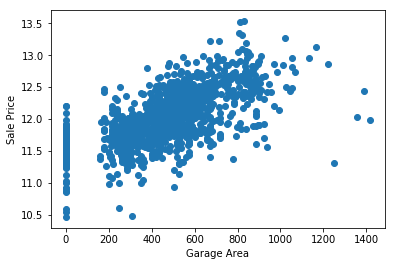

In [107]:
plt.scatter(x=df['GarageArea'], y=target)
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()

In [ ]:
#From the above graph we can spot 5 outliners

In [ ]:
#Let's remove the outliners